# Intro

Basketball is currently going through a modern renaissance as the three and key revolution is becoming more common in basketball, this style called Morey Ball by some is becoming common place but the question we can ask is does it make a difference in the game itself and are players actually listening and following this trend we will look at this through a multitude of series focusing on playoff teams. We will be looking at two of my favorite player and finding out if one is truly a system player the other is just a glorified 3 and D player and then looking at a New York favorite to see if he is worth all the money and attention he gets. We will be looking at their field goal percentages and then one unique analysis of each individual. We will look at all of their individual field goal percentages and where they shoot from and then go into unique tests for each of them.

## Clean up 


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/JR/Downloads/nba-shot-logs/shot_logs.csv')
%matplotlib inline
del df['MATCHUP']
del df['GAME_ID']
del df['LOCATION']
del df['W']
del df['FINAL_MARGIN']
Kawhidf = df[df.player_id == 202695]
Klaydf = df[df.player_id == 202691]
Melodf = df[df.player_id == 2546]

# Analysis 

## First question:  Kawhi "The Klaw" Leonard

Kawhi has established himself as a premier player in the NBA and we will see if his greatness is part of the spurs system where players get open shots and doesn't hold the ball. I believe that he is not a product of the system is just a great player that is helped by his team. We look at how long he holds the ball before he shoots how often he has open shots and his overall field goal percentage to try and guage if he just looks good because he is open.

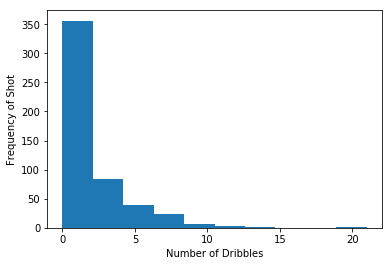

In [9]:
plt.hist(Kawhidf['DRIBBLES'])
plt.xlabel('Number of Dribbles')
plt.ylabel('Frequency of Shot')

Here we see that almost all of his shots happen within 3 dribbles which is indicative of the Spurs system which is a Princeton style offense with Flow elements that mean always searching for the open pass, this means that his greatness could be attributed to the system but let's see though if the distance of the closest defender is why he doesn't dribble,  Within Basketball a "open shot" is considered so when a defender is over 5 feet away let's use that as the parameter for the amount of shots he took.

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,72,72,72,70,72,72,72,72,72,72,72,72,72,72,72
missed,109,109,109,106,109,109,109,109,109,109,109,109,109,109,109


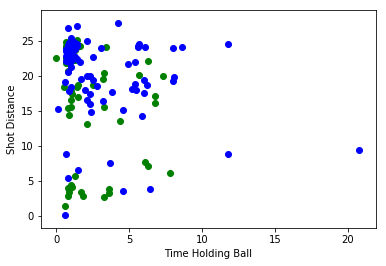

In [10]:
defKawhidf = Kawhidf[Kawhidf. CLOSE_DEF_DIST > 5 ] 
defKawhimadedf = defKawhidf[defKawhidf. SHOT_RESULT == 'made']
defKawhimissdf = defKawhidf[defKawhidf. SHOT_RESULT == 'missed']
plt.scatter(x = defKawhimadedf['TOUCH_TIME'], y = defKawhimadedf['SHOT_DIST'], color = 'Green')
plt.scatter(x = defKawhimissdf['TOUCH_TIME'], y = defKawhimissdf['SHOT_DIST'], color = 'blue')
plt.xlabel('Time Holding Ball')
plt.ylabel('Shot Distance')
defKawhidf.groupby ('SHOT_RESULT').count()

With that we see that most of his open shots happen with him holding the ball for less than five seconds and that he also makes around 66% of open shots, due to my love of Basketball I know the average for open shots is 55%, (Basketballref.com) so Kawhi shows that he shoots well above average compared to the average NBA player. This helps debunk that he is just a system player because he is over the average by a significant margin. However we will next just look at a simple measure to see if Kawhi is great, his field goal percentage.

In [11]:
threeKawhidf = Kawhidf[Kawhidf.PTS_TYPE == 3]
twoKawhidf = Kawhidf[Kawhidf.PTS_TYPE == 2]
threeKawhidf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,43,43,43,42,43,43,43,43,43,43,43,43,43,43,43
missed,89,89,89,86,89,89,89,89,89,89,89,89,89,89,89


In [12]:
Kawhidf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,232,232,232,224,232,232,232,232,232,232,232,232,232,232,232
missed,284,284,284,274,284,284,284,284,284,284,284,284,284,284,284


With this we can now calculate both his Field goal percentage and his field goal percentage. They are 32% for his three point shot and 45% for his field goal percentage. Next we will calculate his effective field goal percent which is an advanced analytical stat. It is calculated by the following formula, (FGM + 0.5 * 3PM) / FGA, with that his effective field goal of 49% which is slightly above average.

In conclusion with Kawhi this year shows him as an above average offensive weapon and unfortunately defensive stats are not useful for determining his defensive value you know for that NBA year he won the NBA Finals MVP for his defense on LeBron James and was considered an elite defense player so while it does not show how great he has become we can see the beginning of the greatness that is the Klaw.  A question I would like to look at further is his secondary assists value and more of his defensive presences as more advanced stats are not publically available but help portray defense numerically better such as DRP and %OFG

## Second Question: Klay Thompson,  3 and D

Klay has a become a key piece to the Golden State warriors but does have a reputation as another great defender who is also the perfect example of a 3 and D player with no ball handling skills we are going to test that and see what we find out. We will also look at how often he dribbles the ball which would show him as a spot up shooter, a look at his field goal percentage and finally a look at his shooting in the fourth quarter to see if he steps up when it matters. I believe that this will show him as clutch performer who is the perfect spot up shooter.

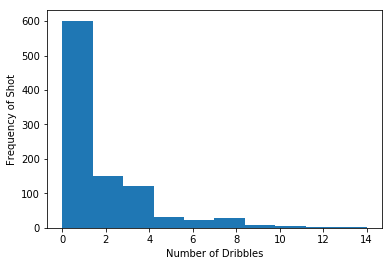

In [13]:
plt.hist(Klaydf['DRIBBLES'])
plt.xlabel('Number of Dribbles')
plt.ylabel('Frequency of Shot')

Klay like Kawhi as well doesn't dribble much when he shoots and does the majority of his shots as a catch and shoot player, let's map this distance to see if he is just a three point shooter.

In [14]:
threeKlaydf = Klaydf[Klaydf.PTS_TYPE == 3]
twoKlaydf = Klaydf[Klaydf.PTS_TYPE == 2]
threeKlaydf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,177,177,177,173,177,177,177,177,177,177,177,177,177,177,177
missed,230,230,230,223,230,230,230,230,230,230,230,230,230,230,230


In [15]:
Klaydf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,449,449,449,442,449,449,449,449,449,449,449,449,449,449,449
missed,522,522,522,511,522,522,522,522,522,522,522,522,522,522,522


Again similar to Kawhi he has above shooting numbers which is expected of a sharpshooter like him with his three point percentage being 43% and his field goal being a 46% field goal percentage. His effective percentage would be 58% which is great. However this doesn't effectively test this claim if he is just a three and D player, to do that we will test to see the distance he is away from the shots, meaning if he takes most of his shots at the Key and 3 then he is most likely a three and D player.

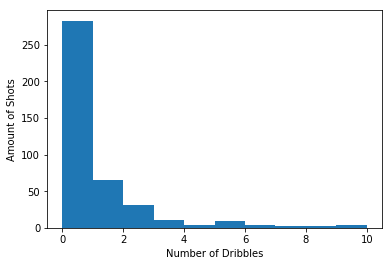

In [16]:
farKlaydf = Klaydf[Klaydf.SHOT_DIST > 22]
plt.hist(farKlaydf['DRIBBLES'])
plt.xlabel('Number of Dribbles')
plt.ylabel('Amount of Shots')

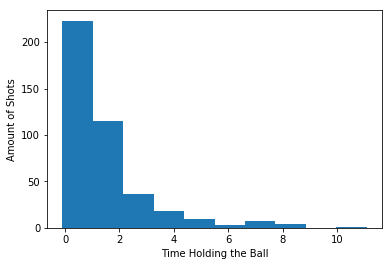

In [17]:
farKlaydf = Klaydf[Klaydf.SHOT_DIST > 22]
plt.hist(farKlaydf['TOUCH_TIME'])
plt.xlabel('Time Holding the Ball')
plt.ylabel('Amount of Shots')

This graph shows that when he is at the 3 point line and catches the ball he most of the time will quickly take the shot. This supports the idea that he is just superstar 3 and D player; let’s next look at his shooting in the fourth quarter.

In [18]:
CKlaydf = Klaydf[Klaydf.PERIOD == 4]
CKlaydf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,68,68,68,67,68,68,68,68,68,68,68,68,68,68,68
missed,107,107,107,105,107,107,107,107,107,107,107,107,107,107,107


Here we can see that his field goal percentage drops down to 38% which would show that he is not better in the fourth quarter, but overall it would seem that he is the best example of a 3 and D player. So in conclusion he is a spot up shooter that doesn't hold the ball much but surprisingly he doesn't show up in the fourth quarter compared to his normal self. Some advanced stuff I would like to look for in Klay would be his primary verus his secondary shot selection meaning that was he passed the ball to once or multiple times before shooting.

## Carmelo Anthony, is he another Ewing?

Carmelo Anthony is the star player for the New York Knicks which is the most profitable franchise in the NBA, However he draws a lot of criticism from the media and from his own teammates and coaches for being a ball hog and shooting ineffective shots we shall see if that is the case. We will look at how much he dribbles the ball, how long he holds the ball for and when he shoots it and from where with a defender near him, along with his field goal percentage. I believe Carmelo holds the ball for too long with a defender near him along with taking a lot of midrange shots which analytics people don't like.

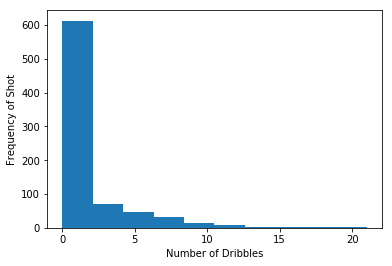

In [19]:
plt.hist(Melodf['DRIBBLES'])
plt.xlabel('Number of Dribbles')
plt.ylabel('Frequency of Shot')

Here we see a similar amount of dribbles to Kawhi which would defeat the claim that he is a ball hog but to confirm that idea let’s look at how long he holds the ball before he shoots and from where, along with if there are defenders near him.

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,111,111,111,99,111,111,111,111,111,111,111,111,111,111,111
missed,175,175,175,159,175,175,175,175,175,175,175,175,175,175,175


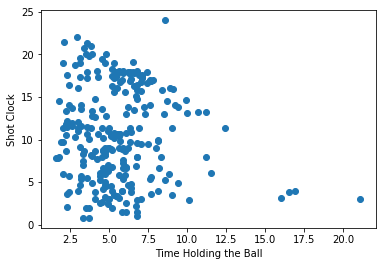

In [20]:
FMelodf = Melodf[Melodf.DRIBBLES > 1]
plt.scatter(x = FMelodf['TOUCH_TIME'], y = FMelodf['SHOT_CLOCK'] )
plt.xlabel('Time Holding the Ball')
plt.ylabel('Shot Clock')
FMelodf.groupby('SHOT_RESULT').count()

From the table and the graph we can tell that he makes more shots then he misses if he holds the ball but it also clearly shows in the graph that he takes shots with plenty of time left on the shot clock and means that it could not be the best shot for the team so let's see of those shots are good with defenders close by.

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,55,55,55,48,55,55,55,55,55,55,55,55,55,55,55
missed,83,83,83,72,83,83,83,83,83,83,83,83,83,83,83


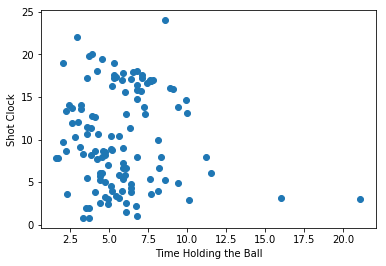

In [21]:
DFMelodf = FMelodf[FMelodf.CLOSE_DEF_DIST < 3]
plt.scatter(x = DFMelodf['TOUCH_TIME'], y = DFMelodf['SHOT_CLOCK'] )
plt.xlabel('Time Holding the Ball')
plt.ylabel('Shot Clock')
DFMelodf.groupby('SHOT_RESULT').count()

Now we see a different story. Next let's see the distance of these shots.

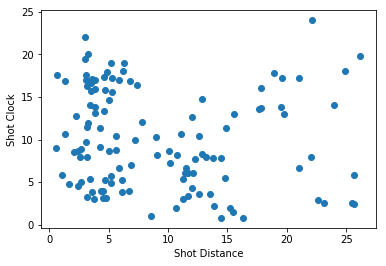

In [22]:
plt.scatter(x = DFMelodf['SHOT_DIST'], y = DFMelodf['SHOT_CLOCK'] )
plt.xlabel('Shot Distance')
plt.ylabel('Shot Clock')

Here we see that he shoots a majority of his shots are within 15 feet and a plurality coming within 5 feet, let's see if the midrange shots, between 3-15 feet he is holding onto the ball for an abnormal amount of time.

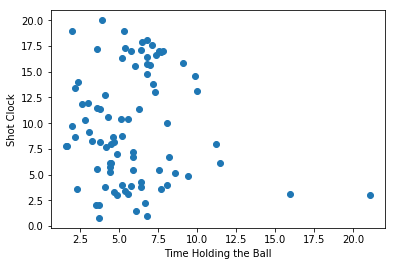

In [23]:
MdMelodf = DFMelodf[DFMelodf.SHOT_DIST > 3]
MidMelodf = MdMelodf[MdMelodf.SHOT_DIST < 16]
plt.scatter(x = MidMelodf['TOUCH_TIME'], y = MidMelodf['SHOT_CLOCK'] )
plt.xlabel('Time Holding the Ball')
plt.ylabel('Shot Clock')

As the graph shows he takes these midrange shots while being closly defended while holding onto the ball for a long time and looks like with plenty of time left on the shot clock which stagnates an offense so it is not the best idea for him to be passed to. Next we will look at his field goal percentage.

In [24]:
threeMelodf = Melodf[Melodf.PTS_TYPE == 3]
twoMelodf = Melodf[Melodf.PTS_TYPE == 2]
threeMelodf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,60,60,60,56,60,60,60,60,60,60,60,60,60,60,60
missed,116,116,116,101,116,116,116,116,116,116,116,116,116,116,116


In [25]:
Melodf.groupby('SHOT_RESULT').count()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
SHOT_RESULT,,,,,,,,,,,,,,,
made,349,349,349,331,349,349,349,349,349,349,349,349,349,349,349
missed,443,443,443,415,443,443,443,443,443,443,443,443,443,443,443


We can see that Carmelo shoots a lot more twos then threes his three point field goal percentage is 34% which is below average but he doesn't take too many of those whilst his field goal percentage is 44% which is good and his effective field goal percentage is 47% which is not good. Overall we found out that he is a large volume shooter that takes a lot of guarded midrange shoots while shooting a high percentage but suffocates the offense by holding the ball too much and then shooting when there is still plenty of time left on the clock. For Carmelo I would like to look further into his other stats such as rebounding and assists to see if he contributes in other ways other than scoring.

## Conclusion 

Overall we looked at three different players in the NBA Kawhi Leonard, where we found out that although he gets plenty of open looks from the system he is in his defense and his ability to make those shots at a very high rate help to define how great of a player he is, Next we looked at Klay Thompson who is a great example of a three and D player that seems to not be able to rise up in the fourth, and finally we looked at Carmelo Anthony a mid range shooter that holds onto the ball and may shoot a high percentage but doesn't shoot effectively.